In [1]:
import numpy as np
import matplotlib.pyplot as plt

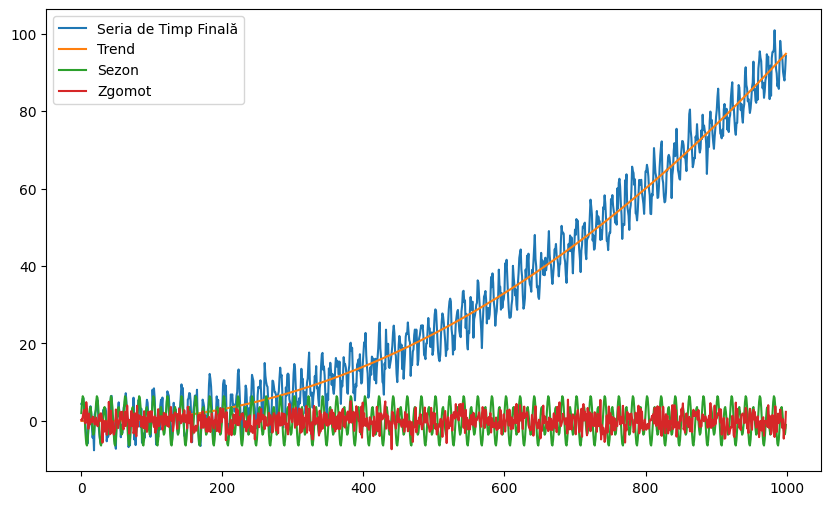

In [22]:
# Pasul 1: Generare trend
def generate_trend(t):
    return (0.1 * t**2 - 5 * t + 10) / 1000

# Pasul 2: Generare sezon
def generate_season(t):
    f1, f2 = 0.1, 0.05
    A, B = 5, 2
    return A * np.sin(2 * np.pi * f1 * t) + B * np.cos(2 * np.pi * f2 * t)

# Pasul 3: Generare zgomot alb gaussian
def generate_noise(t, sigma=1):
    return np.random.normal(0, sigma, len(t))

# Pasul 4: Generare seria de timp finală
def generate_time_series(N):
    t = np.arange(N)
    trend = generate_trend(t)
    season = generate_season(t)
    noise = generate_noise(t, sigma=2)
    time_series = trend + season + noise
    return time_series

# Pasul 5: Vizualizare
N = 1000
time_series = generate_time_series(N)

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Seria de Timp Finală')
plt.plot(generate_trend(np.arange(N)), label='Trend')
plt.plot(generate_season(np.arange(N)), label='Sezon')
plt.plot(generate_noise(np.arange(N), sigma=2), label='Zgomot')
plt.legend()
plt.show()